In [65]:
from itertools import accumulate, batched


def pulses_to_samples(pulses, n):
    samples = [0] * n
    for t in pulses:
        samples[t] = +1
    return samples

def ss(samples, R):
    """samples to string"""
    s = '  '.join(' '.join(str(s) for s in bat) for bat in batched(samples, R))
    return s

ns = 20
pulses = [1, 5, 7, 14]
R, M, N = 5, 2, 1

s0 = pulses_to_samples(pulses, ns)
print(f'samples: {ss(s0, R)}')
s1 = list(accumulate(s0))
print(f's1     : {ss(s1, R)}')
s2 = list(accumulate(s1))
print(f's2     : {ss(s2, R)}')
s3 = list(accumulate(s2))
print(f's3     : {ss(s3, R)}')
s4 = list(accumulate(s3))
print(f's4     : {ss(s4, R)}')
s5 = list(accumulate(s4))
print(f's5     : {ss(s5, R)}')


samples: 0 1 0 0 0  1 0 1 0 0  0 0 0 0 1  0 0 0 0 0
s1     : 0 1 1 1 1  2 2 3 3 3  3 3 3 3 4  4 4 4 4 4
s2     : 0 1 2 3 4  6 8 11 14 17  20 23 26 29 33  37 41 45 49 53
s3     : 0 1 3 6 10  16 24 35 49 66  86 109 135 164 197  234 275 320 369 422
s4     : 0 1 4 10 20  36 60 95 144 210  296 405 540 704 901  1135 1410 1730 2099 2521
s5     : 0 1 5 15 35  71 131 226 370 580  876 1281 1821 2525 3426  4561 5971 7701 9800 12321


len(samples)=20 len(integrated)=20
integrated: [0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7]
decimated: [0, 2, 3, 4, 6]
out: [0, 2, 3, 2, 3]
t = 0

t = 4
  tp = 1
  tp = 4

t = 8
  tp = 7

t = 12
  tp = 10

t = 16
  tp = 13
  tp = 16

decimated: [0, 2, 3, 4, 6]
out: [0, 2, 3, 2, 3]


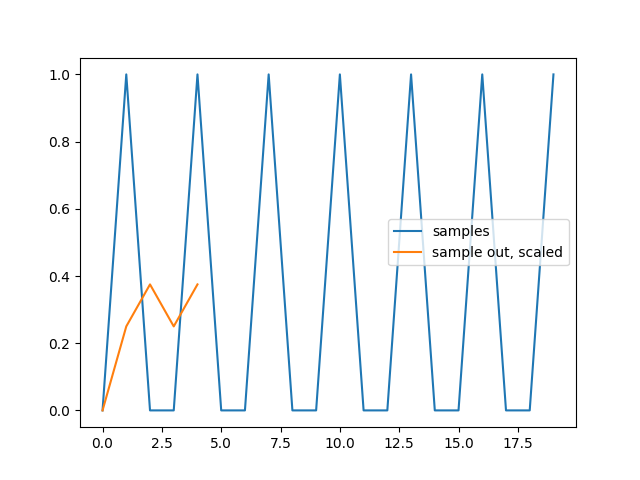

In [45]:
%matplotlib widget
import importlib
import matplotlib.pyplot as plt
import numpy as np

import cic
importlib.reload(cic)
from cic import CICDecimator, CICPulseDecimator

def pulses_to_samples(pulses, n):
    samples = [0] * n
    for t in pulses:
        samples[t] = +1
    return samples


class TestCICPulseDecimator:

    def __init__(self, R, M, N):
        self.R = R
        self.N = N
        self.t0 = 0
        self.acc = [0] * N
        self.inc = 0
        self.combs = [cic.Comb(M) for i in range(N)]

    def process_pulses(self, pulses, n):

        decimated = []
        j = 0
        for t in range(self.t0, self.t0 + n, self.R):
            print(f'{t = }')
            while j < len(pulses):
                tp = pulses[j] # time of pulse
                if tp > t:
                    break
                print(f'  tp = {tp}')
                self.inc += +1
                self.acc[0] += +1
                self.t0 = tp
                j += 1
            self.t0 = t
            decimated.append(self.acc[0])
            print()

        combed = decimated
        for c in self.combs:
            combed = c.process(combed)
        
        self.intermediates = cic.Intermediates(None, None, decimated, combed)
        return combed


ns = 20
pulses = range(1, ns, 3)
samples = pulses_to_samples(pulses, ns)

# R, M, N = 17, 2, 1
R, M, N = 4, 2, 1
cic1 = CICDecimator(R, M, N)
samples_out = cic1.process(samples)
samples_im = cic1.intermediates
print(f'integrated: {samples_im.integrated}')
print(f'decimated: {samples_im.decimated}')
print(f'out: {samples_out}')

cic2 = TestCICPulseDecimator(R, M, N)
pulses_out = cic2.process_pulses(pulses, ns)
pulses_im = cic2.intermediates
print(f'decimated: {pulses_im.decimated}')
print(f'out: {pulses_out}')

fig = plt.figure()
plt.plot(samples, label='samples')
plt.plot(np.array(samples_out) / (R * M)**N, label='sample out, scaled')
plt.legend() and None
